# Advanced Plotting Exercises: Building Dashboards with Seaborn and Plotly

In these exercises, you will learn how to create interactive and static dashboards using Seaborn and Plotly. All exercises use real-world data from [Our World in Data](https://ourworldindata.org/), a comprehensive source for global development indicators.

The exercises progress from exploratory visualization with Seaborn to advanced interactive dashboards with Plotly, including 3D visualizations.

## Exercise 1: Import Libraries and Load Life Expectancy Data

**Objective**: Set up the environment and load the life expectancy dataset for exploration.

In this exercise, you will:

1. Import all necessary libraries for visualization and data manipulation
2. Load the life expectancy dataset 
3. Explore the dataset structure, columns, and basic statistics
4. Check for missing values and data types

**Dataset**: World Bank Life Expectancy Data
[https://ourworldindata.org/grapher/life-expectancy.csv?v=1&csvType=full&useColumnShortNames=false](https://ourworldindata.org/grapher/life-expectancy.csv?v=1&csvType=full&useColumnShortNames=false)

**Alternative Approach**: Load sample life expectancy data from seaborn or create a synthetic dataset matching the pattern

**Your Task**: 
- Load the life expectancy dataset (from file or URL)
- Display the first 10 rows
- Show the shape, data types, and summary statistics
- Identify and document any missing values
- Report the time period and number of countries covered

In [1]:
## SOLUTION

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
sns.set_palette('husl')


# Fetch the data.
df = pd.read_csv("https://ourworldindata.org/grapher/life-expectancy.csv?v=1&csvType=full&useColumnShortNames=false")

df

,Entity,Code,Year,Life expectancy
0,Afghanistan,AFG,1950,28.1563
1,Afghanistan,AFG,1951,28.5836
2,Afghanistan,AFG,1952,29.0138
3,Afghanistan,AFG,1953,29.4521
4,Afghanistan,AFG,1954,29.6975
...,...,...,...,...
21560,Zimbabwe,ZWE,2019,61.0603
21561,Zimbabwe,ZWE,2020,61.5300
21562,Zimbabwe,ZWE,2021,60.1347
21563,Zimbabwe,ZWE,2022,62.3601


## Exercise 2: Exploratory Data Visualization with Seaborn

**Objective**: Create focused, meaningful visualizations showing life expectancy trends and distributions.

**Requirements - Create exactly 3 plots in a 1x3 horizontal layout showing:**

1. **(Left) Distribution of Life Expectancy in 2019**: 

   - Filter to year 2019 only
   - Create a simple histogram with 18 bins
   - Title: "Global Life Expectancy Distribution - 2019"

2. **(Center) Trends of 6 Key Countries Over Time**:

   - Use these specific countries: Japan, United States, Germany, Brazil, India, Nigeria
   - Create line plot showing Year (x) vs Life Expectancy (y)
   - Color each country differently for clarity
   - Include legend and use data from 1960 onwards
   - Title: "Life Expectancy Trends: 6 Key Countries (1960-2019)"

3. **(Right) Current Status in 2019 - Bar Chart**:

   - Use the same 6 countries: Japan, United States, Germany, Brazil, India, Nigeria
   - Create bar chart showing each country's life expectancy in 2019
   - Title: "Life Expectancy in 2019: 6 Key Countries"
   - Shows: Which countries have the highest/lowest life expectancy today?

**All plots must have**: Clear titles, axis labels, and readable formatting

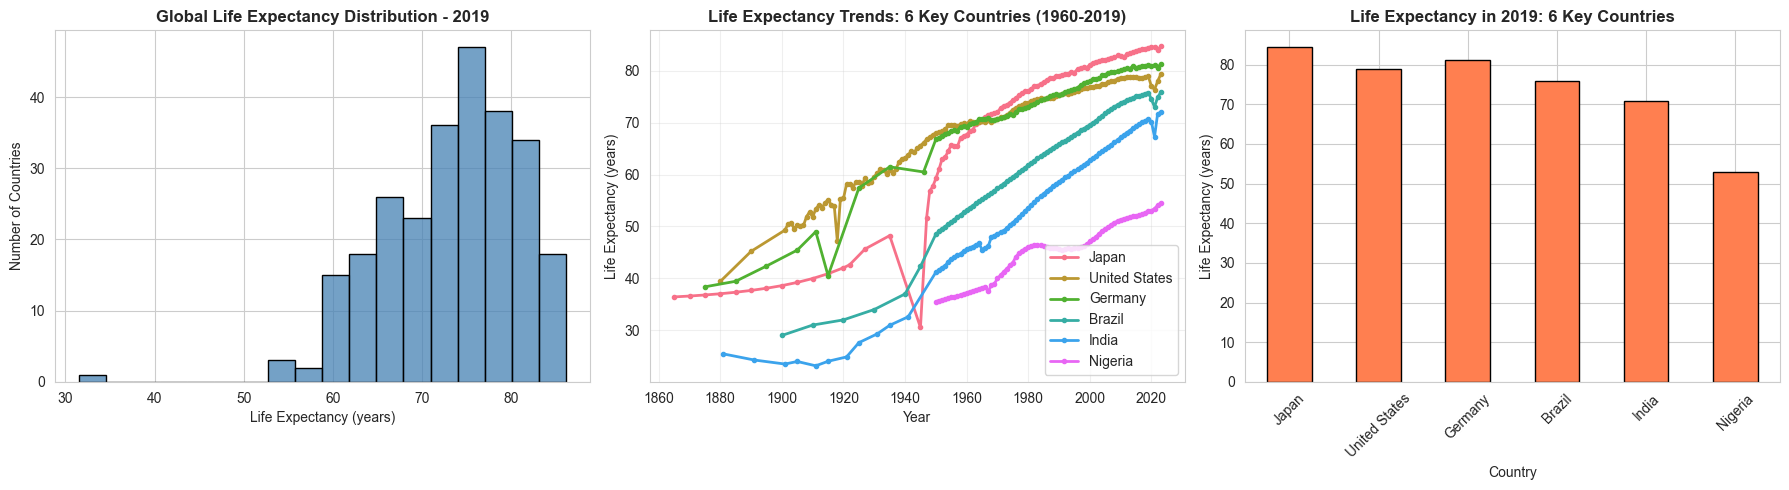

In [2]:
## SOLUTION

df_clean = df.dropna(subset=['Life expectancy'])
countries_six = ['Japan', 'United States', 'Germany', 'Brazil', 'India', 'Nigeria']
df_six = df_clean[df_clean['Entity'].isin(countries_six)]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data=df_clean[df_clean['Year'] == 2019], x='Life expectancy', bins=18, ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Global Life Expectancy Distribution - 2019', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Life Expectancy (years)')
axes[0].set_ylabel('Number of Countries')

for country in countries_six:
    data = df_six[df_six['Entity'] == country]
    axes[1].plot(data['Year'], data['Life expectancy'], marker='o', label=country, linewidth=2, markersize=3)
axes[1].set_title('Life Expectancy Trends: 6 Key Countries (1960-2019)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Life Expectancy (years)')
axes[1].legend(loc='lower right')
axes[1].grid(True, alpha=0.3)

df_2019 = df_six[df_six['Year'] == 2019].set_index('Entity').loc[countries_six]
df_2019['Life expectancy'].plot(kind='bar', ax=axes[2], color='coral', edgecolor='black')
axes[2].set_title('Life Expectancy in 2019: 6 Key Countries', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Country')
axes[2].set_ylabel('Life Expectancy (years)')
axes[2].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

## Exercise 3: Multi-plot Seaborn Dashboard with FacetGrid

**Objective**: Create a FacetGrid showing life expectancy trends across different countries.

**Requirements**:

- Use these 6 specific countries (one per subplot, arranged in 2 rows × 3 columns):
  - **Row 1**: Japan, Germany, United States
  - **Row 2**: Brazil, India, Nigeria

- For each country:
  - Create a scatter plot with Year (x-axis) vs Life Expectancy (y-axis)
  - Add a regression line in red showing the trend
  - Title each subplot with just the country name
  - Ensure clear axis labels: "Year" and "Life Expectancy (years)"


Look at the trends and consider ways to address these questions quantitatively:

1. Which countries show the steepest improvement (highest slope)?
2. Which countries started with the lowest life expectancy in 1960?

3. Are there any countries with plateaus or slower growth in recent decades?3. Are there any countries with plateaus or slower growth in recent decades?

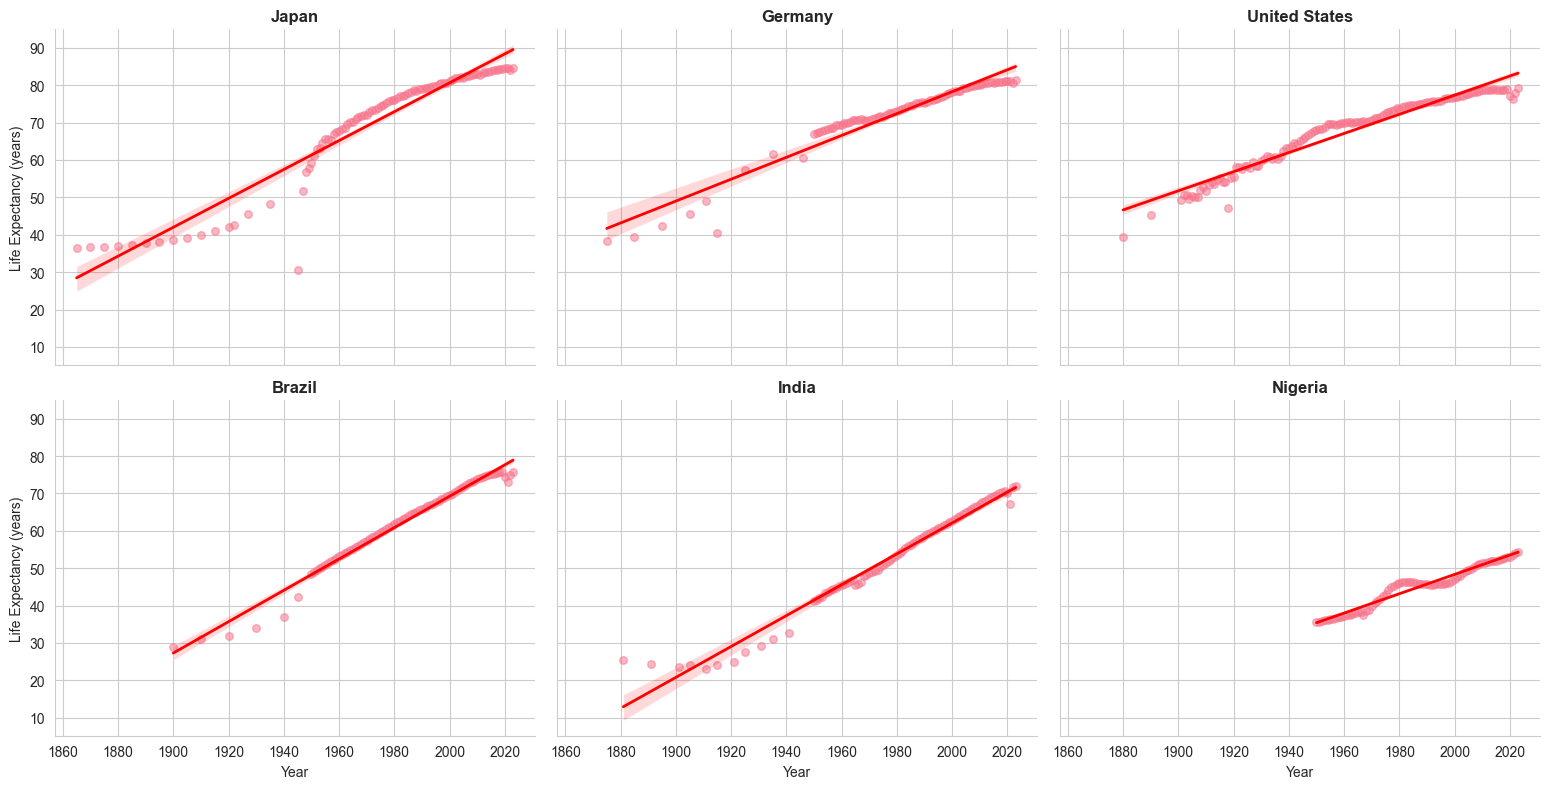

In [3]:
## SOLUTION

countries_selected = ['Japan', 'Germany', 'United States', 'Brazil', 'India', 'Nigeria']
df_selected = df_clean[df_clean['Entity'].isin(countries_selected)]

g = sns.FacetGrid(df_selected, col='Entity', col_wrap=3, height=4, aspect=1.3, 
                   col_order=countries_selected)
g.map(sns.regplot, 'Year', 'Life expectancy', scatter_kws={'alpha': 0.5, 's': 30}, 
      line_kws={'color': 'red', 'linewidth': 2})

for ax, country in zip(g.axes.flat, countries_selected):
    ax.set_title(country, fontsize=12, fontweight='bold')

g.set_axis_labels('Year', 'Life Expectancy (years)')

plt.tight_layout()
plt.show()

## Exercise 4: Seaborn Heatmap - Life Expectancy Across Countries and Years

**Objective**: Create a heatmap to visualize life expectancy patterns across countries and compare their progress over time.

**Requirements**:

- Select the 10 countries with the highest average life expectancy (using all available data)
- Filter data from 2010 to 2019 (one decade)
- Create a heatmap with:
  - **Rows**: Countries
  - **Columns**: Years
  - **Values**: Life expectancy in years, annotated on each cell
  - **Colors**: Use the 'RdYlGn' (Red-Yellow-Green) colormap to show progression
  - **Title**: "Life Expectancy: Top 10 Countries (2010-2019)"
  - **Clear labels**: Axis labels and colorbar label


1. Which countries maintain the highest life expectancy throughout the decade?
2. Are there any countries showing stagnation (no improvement) in the heatmap?

3. What does the color gradient reveal about progress?3. What does the color gradient reveal about progress?

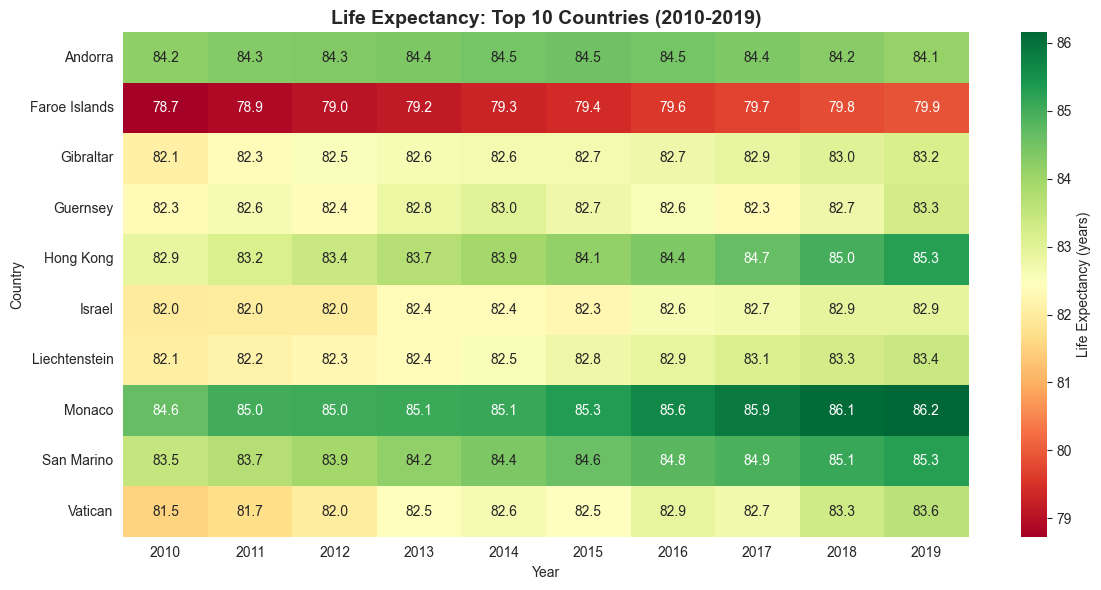

In [4]:
## SOLUTION

# Select top 10 countries by average life expectancy
top_10_countries = df_clean.groupby('Entity')['Life expectancy'].mean().nlargest(10).index

# Filter data for 2010-2019
df_heatmap = df_clean[(df_clean['Entity'].isin(top_10_countries)) & 
                       (df_clean['Year'] >= 2010) & 
                       (df_clean['Year'] <= 2019)]

# Create pivot table: countries as rows, years as columns
pivot = df_heatmap.pivot_table(values='Life expectancy', index='Entity', columns='Year')

# Create heatmap
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='RdYlGn', cbar_kws={'label': 'Life Expectancy (years)'}, ax=ax)
ax.set_title('Life Expectancy: Top 10 Countries (2010-2019)', fontsize=14, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Country')

plt.tight_layout()
plt.show()

## Exercise 5: Interactive Line Plot with Plotly

**Objective**: Create an interactive line plot showing trends for multiple countries over time.

**Requirements**:
- Use the same 6 countries from Exercise 2: Japan, United States, Germany, Brazil, India, Nigeria
- Create a line plot with time on x-axis and life expectancy on y-axis
- Each country should have a distinct color and be connected with a line
- Show data from 1960 onwards
- Add markers (dots) at data points for clarity
- Include meaningful hover information showing: country name, year, and life expectancy
- Add title: "Life Expectancy Trends: Interactive View"
- Add axis labels: "Year" and "Life Expectancy (years)"

**Interactivity Features** (built-in to Plotly):

- Hover over any line to see exact values
- Click legend entries to hide/show countries
- Zoom, pan, and download the plot

In [5]:
## SOLUTION

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

countries_six = ['Japan', 'United States', 'Germany', 'Brazil', 'India', 'Nigeria']
df_plot = df_clean[df_clean['Entity'].isin(countries_six)]

fig = px.line(df_plot, x='Year', y='Life expectancy', color='Entity',
              hover_name='Entity',
              hover_data={'Year': True, 'Life expectancy': ':.1f', 'Entity': False},
              title='Life Expectancy Trends: Interactive View',
              labels={'Life expectancy': 'Life Expectancy (years)', 'Year': 'Year'},
              markers=True)

fig.show()

## Exercise 6: Plotly Subplots Dashboard

**Objective**: Create a simple Plotly dashboard with multiple visualizations using subplots.

**Requirements**:
- Create a dashboard with 2 subplots in a 1 row × 2 columns layout

**Subplot 1 (Left) - Line Plot**:
- Show life expectancy trends for 3 countries: Japan, Brazil, Nigeria
- X-axis: Year (from 1960 onwards)
- Y-axis: Life expectancy
- Include legend and markers on the lines
- Title: "Life Expectancy Trends: 3 Countries"

**Subplot 2 (Right) - Bar Chart**:
- Show average life expectancy for the top 5 countries
- X-axis: Country names
- Y-axis: Average life expectancy
- Title: "Average Life Expectancy: Top 5 Countries"
- Bars should be colored light blue

**Dashboard Features**:

- Hover information on all plots
- Clear axis labels
- Overall title: "Life Expectancy Dashboard"

In [6]:
## SOLUTION

# Prepare data for subplot 1: Line plot for 3 countries
countries_three = ['Japan', 'Brazil', 'Nigeria']
df_three = df_clean[df_clean['Entity'].isin(countries_three)]

# Prepare data for subplot 2: Bar chart for top 5 countries
top_5 = df_clean.groupby('Entity')['Life expectancy'].mean().nlargest(5).reset_index()

# Create subplots: 1 row, 2 columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Life Expectancy Trends: 3 Countries', 'Average Life Expectancy: Top 5 Countries')
)

# Add line traces to subplot 1
for country in countries_three:
    data = df_three[df_three['Entity'] == country]
    fig.add_trace(
        go.Scatter(x=data['Year'], y=data['Life expectancy'], mode='lines+markers',
                   name=country, hovertemplate='%{x}<br>%{y:.1f} years'),
        row=1, col=1
    )

# Add bar trace to subplot 2
fig.add_trace(
    go.Bar(x=top_5['Entity'], y=top_5['Life expectancy'], 
           marker_color='lightblue', name='Avg Life Expectancy',
           hovertemplate='%{x}<br>%{y:.1f} years'),
    row=1, col=2
)

# Update axes labels
fig.update_xaxes(title_text='Year', row=1, col=1)
fig.update_yaxes(title_text='Life Expectancy (years)', row=1, col=1)

fig.update_xaxes(title_text='Country', row=1, col=2)
fig.update_yaxes(title_text='Average Life Expectancy (years)', row=1, col=2)

# Update layout

fig.update_layout(height=500, title_text='Life Expectancy Dashboard', showlegend=True)
fig.show()

## Exercise 7: 3D Line Plot - Life Expectancy Over Time

Create a 3D line plot showing how 11 countries improved their life expectancy from 2000 to 2019.

Use these countries organized by region:

- Asia: Japan, China
- Europe: Germany, France
- Americas: United States, Canada, Mexico, Brazil, Paraguay
- Africa: Lesotho
- Oceania: Australia, Tuvalu

The plot should have:
- X-axis: Year (2000-2019)
- Y-axis: Life expectancy in years
- Z-axis: Improvement from 2000 baseline
- Color: Income level (green, orange, red)
- Lines: One line per country showing its trajectory


Plot each country's path to see which groups improved the most. High-income countries should have flat lines (already high, little room to improve). Low-income countries should have steep upward lines (more room to gain).Hover to see country name, year, life expectancy, and improvement amount.



In [7]:
## SOLUTION

# Select countries and filter data from 2000 onwards
countries = ['Japan', 'China', 'Germany', 'France', 'United States', 'Canada', 
             'Mexico', 'Brazil', 'Paraguay', 'Lesotho', 'Australia', 'Tuvalu']

df_plot = df_clean[df_clean['Entity'].isin(countries) & (df_clean['Year'] >= 2000)].copy()
df_plot = df_plot.sort_values(['Entity', 'Year'])

# Calculate improvement from 2000 baseline for each country
for country in countries:
    baseline_val = df_plot[(df_plot['Entity'] == country) & (df_plot['Year'] == 2000)]['Life expectancy'].values
    if len(baseline_val) > 0:
        df_plot.loc[df_plot['Entity'] == country, 'Improvement'] = \
            df_plot.loc[df_plot['Entity'] == country, 'Life expectancy'] - baseline_val[0]

# Define regions and colors
regions = {
    'Japan': 'Asia', 'China': 'Asia',
    'Germany': 'Europe', 'France': 'Europe',
    'United States': 'Americas', 'Canada': 'Americas', 'Mexico': 'Americas', 'Brazil': 'Americas', 'Paraguay': 'Americas',
    'Lesotho': 'Africa',
    'Australia': 'Oceania', 'Tuvalu': 'Oceania'
}
colors = {'Asia': '#e74c3c', 'Europe': '#3498db', 'Americas': '#2ecc71', 'Africa': '#f39c12', 'Oceania': '#9b59b6'}

# Create 3D plot
fig = go.Figure()
for country in countries:
    data = df_plot[df_plot['Entity'] == country]
    
    fig.add_trace(go.Scatter3d(
        x=data['Year'], y=data['Life expectancy'], z=data['Improvement'],
        mode='lines+markers', name=country,
        line=dict(color=colors[regions[country]], width=4), marker=dict(size=2),
        hovertemplate=f'{country}<br>Year: %{{x}}<br>Life Exp: %{{y:.1f}}<br>Improvement: %{{z:.2f}} years<extra></extra>'
    ))

fig.update_layout(
    title='3D Life Expectancy: Improvement by Region (2000-2019)',
    scene=dict(xaxis_title='Year', yaxis_title='Life Expectancy (years)', zaxis_title='Improvement from 2000 (years)'),
    height=700, width=1000
)

fig.show()

## Exercise 8: Interactive Plot with Dropdown Menu

**Objective**: Create an interactive line plot with a dropdown menu to filter countries by region.

**How to Build a Dropdown Menu in Plotly**

A dropdown menu uses Plotly's `updatemenus` feature to show/hide traces based on user selection. 

To construct a dropdown menu, you typically:

- Create a figure with all traces (one per country)
- Define dropdown buttons as a list of dict objects, each with a label and update method
- Add the dropdown to the figure's layout

Here's the essential structure:

```python
# 1. Create figure with all traces
fig = go.Figure()
for country in all_countries:
    data = df[df['Entity'] == country]
    fig.add_trace(go.Scatter(x=data['Year'], y=data['Life expectancy'], name=country))

# 2. Define dropdown buttons
buttons = [
    dict(label='All Countries',
         method='update',
         args=[{'visible': [True] * len(all_countries)},
               {'title': 'All Countries'}]),
    dict(label='Region 1',
         method='update',
         args=[{'visible': [country in ['Country1', 'Country2'] for country in all_countries]},
               {'title': 'Region 1'}])
]

# 3. Add dropdown to layout
fig.update_layout(
    updatemenus=[
        dict(buttons=buttons, direction='down', x=0.0, y=1.15)
    ]
)
```



Its key features include:

- **buttons**: List of dict objects, each defining a dropdown option with a label and the action to perform
- **visible**: Boolean list controlling which traces display (one boolean per trace, applied in order)
- **method='update'**: Specifies that clicking the button updates the figure's data or layout
- **args**: Contains two elements: `[{data properties}, {layout updates}]` that apply when the button is clicked

**Your Task**:

Create an 11-country interactive plot with 6 dropdown filters:

- All Countries
- Asia (Japan, China)
- Europe (Germany, France)
- Americas (United States, Canada, Mexico, Brazil, Paraguay)
- Africa (Lesotho)
- Oceania (Australia, Tuvalu)

In [8]:
## SOLUTION

# Countries to choose from
all_countries = ['Japan', 'United States', 'Germany', 'Brazil', 'China', 'Mexico', 
                 'Australia', 'France', 'Canada', 'Lesotho', 'Paraguay', 'Tuvalu']

# Define regions
regions_dict = {
    'Japan': 'Asia', 'China': 'Asia',
    'Germany': 'Europe', 'France': 'Europe',
    'United States': 'Americas', 'Canada': 'Americas', 'Mexico': 'Americas', 'Brazil': 'Americas', 'Paraguay': 'Americas',
    'Lesotho': 'Africa',
    'Australia': 'Oceania', 'Tuvalu': 'Oceania'
}

# Filter data and create figure
df_ex8 = df_clean[df_clean['Entity'].isin(all_countries)]
fig = go.Figure()

# Add line for each country
for country in all_countries:
    data = df_ex8[df_ex8['Entity'] == country]
    fig.add_trace(go.Scatter(
        x=data['Year'], y=data['Life expectancy'],
        mode='lines+markers', name=country,
        hovertemplate=country + '<br>Year: %{x}<br>Life Exp: %{y:.1f}<extra></extra>'
    ))

# Create dropdown buttons by region
buttons = [
    dict(label='All Countries',
         method='update',
         args=[{'visible': [True] * len(all_countries)},
               {'title': 'Life Expectancy: All 11 Countries'}]),
    dict(label='Asia',
         method='update',
         args=[{'visible': [country in ['Japan', 'China'] for country in all_countries]},
               {'title': 'Life Expectancy: Asia'}]),
    dict(label='Europe',
         method='update',
         args=[{'visible': [country in ['Germany', 'France'] for country in all_countries]},
               {'title': 'Life Expectancy: Europe'}]),
    dict(label='Americas',
         method='update',
         args=[{'visible': [country in ['United States', 'Canada', 'Mexico', 'Brazil', 'Paraguay'] for country in all_countries]},
               {'title': 'Life Expectancy: Americas'}]),
    dict(label='Africa',
         method='update',
         args=[{'visible': [country in ['Lesotho'] for country in all_countries]},
               {'title': 'Life Expectancy: Africa'}]),
    dict(label='Oceania',
         method='update',
         args=[{'visible': [country in ['Australia', 'Tuvalu'] for country in all_countries]},
               {'title': 'Life Expectancy: Oceania'}])
]

# Add dropdown menu
fig.update_layout(
    updatemenus=[dict(buttons=buttons, direction='down', x=0.0, xanchor='left', y=1.15, yanchor='top')],
    title='Life Expectancy: All 11 Countries',
    xaxis_title='Year', yaxis_title='Life Expectancy (years)',
    height=600, width=1000, hovermode='x unified'
)

fig.show()